In [1]:
import pandas as pd
df = pd.read_csv('./populated.csv')
pd.set_option('display.max_columns', None)
df

name  javascript    python      java        c#       php  \
0          Emily Cowan MD    0.040051  0.689626  0.832952  0.562820  0.444047   
1             Sarah Adams    0.296965  0.190121  0.281385  0.600280  0.696185   
2           Joshua Snyder    0.197889  0.540701  0.668081  0.575533  0.961764   
3             Shawn Smith    0.966091  0.309863  0.109165  0.398428  0.998452   
4          Richard Watson    0.279097  0.625411  0.151815  0.086360  0.093654   
..                    ...         ...       ...       ...       ...       ...   
995  Mrs. Paige Carpenter    0.382743  0.196654  0.430164  0.423235  0.488682   
996          Anthony Berg    0.055839  0.639492  0.790630  0.791973  0.210449   
997         Sara Mcdowell    0.638378  0.777342  0.467308  0.325859  0.829862   
998        Bobby Franklin    0.978511  0.877627  0.057395  0.672401  0.494396   
999          Ronald James    0.395877  0.495058  0.554091  0.177400  0.922743   

      android      html    jquery       c++       css       ios       sql  \
0    0.726752  0.422454  0.644963  0.301039  0.903088  0.660856  0.767974   
1    0.117611  0.991069  0.637927  0.868889  0.230231  0.465500  0.363954   
2    0.451063  0.226038  0.756903  0.193424  0.304163  0.109609  0.087511   
3    0.408153  0.159568  0.119941  0.312752  0.943071  0.501217  0.658022   
4    0.559619  0.379193  0.501676  0.202457  0.099266  0.110315  0.793825   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.793771  0.007373  0.382127  0.180469  0.241637  0.655977  0.417838   
996  0.433306  0.395837  0.375899  0.754687  0.883162  0.878686  0.479286   
997  0.828581  0.114414  0.005088  0.629498  0.183667  0.484233  0.047376   
998  0.302730  0.192526  0.220937  0.738260  0.845405  0.447314  0.952904   
999  0.678736  0.800814  0.140024  0.473465  0.806786  0.155434  0.635353   

        mysql         r   reactjs   node.js    arrays         c   asp.net  \
0    0.523441  0.448785  0.701778  0.715997  0.160985  0.386729  0.404869   
1    0.227051  0.491157  0.127445  0.497716  0.520734  0.285052  0.004475   
2    0.754068  0.995264  0.270742  0.085184  0.754576  0.396046  0.466976   
3    0.985650  0.585217  0.598568  0.967577  0.697330  0.160462  0.623549   
4    0.216229  0.651383  0.857058  0.174563  0.808126  0.442792  0.411437   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.025035  0.959329  0.200777  0.172587  0.448317  0.763849  0.535260   
996  0.946334  0.057935  0.805193  0.094688  0.000300  0.675916  0.507367   
997  0.055957  0.054979  0.597136  0.607735  0.035998  0.826021  0.811011   
998  0.465126  0.042819  0.988642  0.154956  0.245174  0.667605  0.721636   
999  0.085405  0.812069  0.306631  0.753368  0.872157  0.706251  0.632607   

         json  python-3.x  ruby-on-rails      .net  sql-server     swift  \
0    0.434830    0.715506       0.947572  0.037813    0.842835  0.586039   
1    0.934890    0.138381       0.756217  0.810555    0.250348  0.504436   
2    0.638916    0.753290       0.791697  0.428100    0.046801  0.714669   
3    0.051108    0.153689       0.329981  0.379050    0.949694  0.591699   
4    0.388669    0.488391       0.978258  0.139042    0.133972  0.991886   
..        ...         ...            ...       ...         ...       ...   
995  0.746668    0.743507       0.561436  0.156679    0.839379  0.594579   
996  0.769553    0.855301       0.339010  0.973903    0.930558  0.424224   
997  0.518795    0.225086       0.008202  0.393452    0.121140  0.863611   
998  0.442184    0.947941       0.527916  0.455916    0.021812  0.583048   
999  0.709587    0.809792       0.612927  0.294818    0.449808  0.208071   

       django   angular  objective-c    pandas     excel  angularjs     regex  \
0    0.798398  0.811743     0.040446  0.544961  0.571999   0.972532  0.161456   
1    0.820150  0.456867     0.582524  0.919669  0.431231   0.142017  0.079033   
2    0.138736  0.967967     0.675315  0.55

In [2]:
print(df.columns[0])

name


In [3]:
vector_embeddings = df.drop('name', axis=1).values
vector_embeddings.shape
# vector_embeddings

(1000, 992)

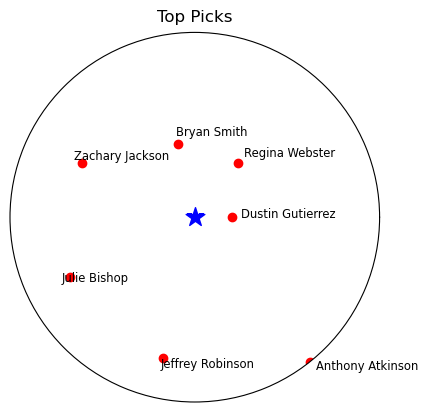

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def plot_adjusted_concentric_neighbours(df, features, num_people):
    similarity_scores = df[features].sum(axis=1)
    
    top_people = similarity_scores.nlargest(num_people)
    
    normalized_scores = (top_people - top_people.min()) / (top_people.max() - top_people.min())
    
    transformed_radii = 1 - np.sqrt(normalized_scores) * 0.8
    
    min_radius = 0.2
    transformed_radii = np.clip(transformed_radii, min_radius, None)
    
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    
    angles = np.linspace(0, 2 * np.pi, num_people, endpoint=False)
    
    datapoint_color = 'red'
    
    for i, (idx, radius) in enumerate(zip(top_people.index, transformed_radii)):
        angle = angles[i]
        
        ax.scatter(angle, radius, color=datapoint_color, label=f'{df.iloc[idx]["name"]}' if i < 5 else '')
        ax.text(angle, radius + 0.05, f'{df.iloc[idx]["name"]}', horizontalalignment='left', size='small', rotation_mode='anchor')
    
    ax.scatter(0, 0, color='blue', marker='*', s=200, label='YOU')
    
    ax.grid(False)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_ylim(0, 1) 

    ax.set_title('Top Picks', va='bottom')
    
    plt.show()

plot_adjusted_concentric_neighbours(df, ['python', 'c++', 'css'], 7)

In [2]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore
cred = credentials.Certificate("./hackmatch.json")
firebase_admin.initialize_app(cred)
db = firestore.client()

In [7]:
import pandas as pd
csv_file_path = './populated.csv'
df = pd.read_csv(csv_file_path)
for index, row in df.iterrows():
    doc_ref = db.collection('HACKMATCH').document()
    doc_ref.set(row.to_dict())

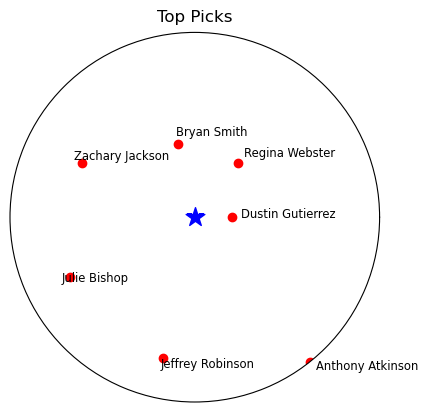

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from firebase_admin import firestore

db = firestore.client()
docs = db.collection('HACKMATCH').stream()
data = [doc.to_dict() for doc in docs]
df = pd.DataFrame(data)

def plot_adjusted_concentric_neighbours(df, features, num_people):
    similarity_scores = df[features].sum(axis=1)
    top_people = similarity_scores.nlargest(num_people)
    normalized_scores = (top_people - top_people.min()) / (top_people.max() - top_people.min())
    transformed_radii = 1 - np.sqrt(normalized_scores) * 0.8
    min_radius = 0.2
    transformed_radii = np.clip(transformed_radii, min_radius, None)
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    angles = np.linspace(0, 2 * np.pi, num_people, endpoint=False)
    for i, (idx, radius) in enumerate(zip(top_people.index, transformed_radii)):
        angle = angles[i]
        ax.scatter(angle, radius, color='red', label=f'{df.iloc[idx]["name"]}' if i < 5 else '')
        ax.text(angle, radius + 0.05, f'{df.iloc[idx]["name"]}', horizontalalignment='left', size='small', rotation_mode='anchor')
    ax.scatter(0, 0, color='blue', marker='*', s=200, label='YOU')
    ax.grid(False)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_ylim(0, 1)
    ax.set_title('Top Picks', va='bottom')
    plt.show()

plot_adjusted_concentric_neighbours(df, ['python', 'c++', 'css'], 7)

In [1]:
import pandas as pd
df = pd.read_csv("D:/Lakshmi Major/2022 High Volume FHV.csv")
len(df)

4684081